In [230]:
import pickle
import numpy as np

In [231]:
with open('/content/sample_data/train_qa.txt','rb') as fp:
  train_data=pickle.load(fp)


In [232]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [233]:
with open('/content/sample_data/test_qa.txt','rb') as fp:
  test_data=pickle.load(fp)


In [234]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [235]:
(' ').join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [236]:
(' ').join(train_data[0][1])

'Is Sandra in the hallway ?'

In [237]:
train_data[0][2]


'no'

In [238]:
vocab=set()

In [239]:
all_data=test_data+train_data

In [240]:
for story, ques, ans in all_data:
  vocab=vocab.union(set(story))
  vocab=vocab.union(set(ques))
  vocab.add('yes')
  vocab.add('no')

In [241]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [242]:
len(vocab)

37

In [243]:
vocab_len =len(vocab)+1

In [244]:
for data in all_data:
  print(data[0],"\n")

Streaming output truncated to the last 5000 lines.

['Daniel', 'went', 'back', 'to', 'the', 'hallway', '.', 'John', 'journeyed', 'to', 'the', 'garden', '.'] 

['Daniel', 'went', 'back', 'to', 'the', 'hallway', '.', 'John', 'journeyed', 'to', 'the', 'garden', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'John', 'grabbed', 'the', 'football', 'there', '.'] 

['Daniel', 'went', 'back', 'to', 'the', 'hallway', '.', 'John', 'journeyed', 'to', 'the', 'garden', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'John', 'grabbed', 'the', 'football', 'there', '.', 'John', 'left', 'the', 'football', '.', 'John', 'took', 'the', 'milk', 'there', '.'] 

['Daniel', 'went', 'back', 'to', 'the', 'hallway', '.', 'John', 'journeyed', 'to', 'the', 'garden', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'John', 'grabbed', 'the', 'football', 'there', '.', 'John', 'left', 'the', 'football', '.', 'John', 'took', 'the', 'milk', 'there', '.', 'Daniel', 'journeyed', 'to', 'the', 'bathroom', '.', 'John

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [245]:
max_story_length=max([len(data[0]) for data in all_data])
max_story_length

156

In [246]:
max_ques_length=max([len(data[1]) for data in all_data])
max_ques_length

6

In [247]:
from keras.preprocessing.sequence import pad_sequences

In [248]:
from keras.preprocessing.text import Tokenizer

In [249]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [250]:
tokenizer=Tokenizer(filters=[])

In [251]:
tokenizer.fit_on_texts(vocab)

In [252]:
tokenizer.word_index

{'.': 31,
 '?': 20,
 'apple': 2,
 'back': 4,
 'bathroom': 5,
 'bedroom': 9,
 'daniel': 30,
 'discarded': 27,
 'down': 13,
 'dropped': 17,
 'football': 36,
 'garden': 1,
 'got': 3,
 'grabbed': 29,
 'hallway': 34,
 'in': 32,
 'is': 6,
 'john': 21,
 'journeyed': 22,
 'kitchen': 23,
 'left': 24,
 'mary': 37,
 'milk': 33,
 'moved': 25,
 'no': 15,
 'office': 26,
 'picked': 7,
 'put': 35,
 'sandra': 12,
 'the': 11,
 'there': 18,
 'to': 16,
 'took': 19,
 'travelled': 8,
 'up': 10,
 'went': 28,
 'yes': 14}

In [253]:
train_story_text=[]
train_ques_text=[]
train_ans=[]

In [254]:
for story, ques,ans in train_data:
  train_story_text.append(story)
  train_ques_text.append(ques)
  

In [255]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [256]:
len(train_story_seq)

10000

In [257]:
def vectorize_stories(data,
  word_index=tokenizer.word_index,
  max_story_length=max_story_length,
  max_ques_length=max_ques_length):

  X=[] #story
  Xq=[] #question
  Y=[]  #answer

  for story, ques, ans in data:
    x=[word_index[word.lower()]for word in story]
    xq=[word_index[word.lower()]for word in ques]
    y=np.zeros(len(word_index)+1)
    y[word_index[ans]]=1
    
    X.append(x)
    Xq.append(xq)
    Y.append(y)

  return(pad_sequences(X,maxlen=max_story_length),
           pad_sequences(Xq,maxlen=max_ques_length),
           np.array(Y))



In [258]:
input_train, ques_train,ans_train=vectorize_stories(train_data)

In [259]:
input_test, ques_test,ans_test=vectorize_stories(test_data)

In [260]:
ques_test

array([[ 6, 21, 32, 11, 23, 20],
       [ 6, 21, 32, 11, 23, 20],
       [ 6, 21, 32, 11,  1, 20],
       ...,
       [ 6, 37, 32, 11,  9, 20],
       [ 6, 12, 32, 11,  1, 20],
       [ 6, 37, 32, 11,  1, 20]], dtype=int32)

In [261]:
input_test

array([[ 0,  0,  0, ..., 11,  9, 31],
       [ 0,  0,  0, ..., 11,  1, 31],
       [ 0,  0,  0, ..., 11,  1, 31],
       ...,
       [ 0,  0,  0, ..., 11,  2, 31],
       [ 0,  0,  0, ..., 11,  1, 31],
       [ 0,  0,  0, ...,  2, 18, 31]], dtype=int32)

In [262]:
ans_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [263]:
tokenizer.word_index['yes']

14

In [264]:
tokenizer.word_index['no']

15

In [265]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute,Dropout, add, dot, concatenate,LSTM



In [266]:
input_sequence=Input((max_story_length,))
question=Input((max_ques_length,))

In [267]:
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len, output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [268]:
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len, output_dim=max_ques_length))
input_encoder_c.add(Dropout(0.3))

In [269]:
ques_encoder=Sequential()
ques_encoder.add(Embedding(input_dim=max_story_length, output_dim=64, input_length=max_ques_length))
ques_encoder.add(Dropout(0.3))

In [270]:
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=ques_encoder(question)

In [271]:
match=dot([input_encoded_m,question_encoded],axes=(2,2))
match=Activation('softmax')(match)

In [272]:
response=add([match,input_encoded_c ])
response=Permute((2,1))(response) 

In [273]:
answer=concatenate([response,question_encoded])


In [274]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [275]:
answer=LSTM(32)(answer)

In [276]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_len)(answer)

In [277]:
answer=Activation('softmax')(answer)

In [278]:
model=Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])


In [279]:
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_9 (Sequential)      (None, None, 64)     2432        ['input_3[0][0]']                
                                                                                                  
 sequential_11 (Sequential)     (None, 6, 64)        9984        ['input_4[0][0]']                
                                                                                            

In [280]:
history=model.fit([input_train,ques_train],ans_train,batch_size=32,epochs=60, validation_data=([input_test,ques_test],ans_test))

Epoch 1/60
313/313 [==============================] - 16s 18ms/step - loss: 0.8826 - accuracy: 0.4879 - val_loss: 0.6947 - val_accuracy: 0.5030
Epoch 2/60
313/313 [==============================] - 5s 17ms/step - loss: 0.7009 - accuracy: 0.5022 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 3/60
313/313 [==============================] - 5s 16ms/step - loss: 0.6950 - accuracy: 0.5044 - val_loss: 0.6956 - val_accuracy: 0.4970
Epoch 4/60
313/313 [==============================] - 5s 17ms/step - loss: 0.6950 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/60
313/313 [==============================] - 5s 17ms/step - loss: 0.6950 - accuracy: 0.5002 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 6/60
313/313 [==============================] - 5s 16ms/step - loss: 0.6944 - accuracy: 0.5031 - val_loss: 0.6939 - val_accuracy: 0.4970
Epoch 7/60
313/313 [==============================] - 5s 16ms/step - loss: 0.6946 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.503

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

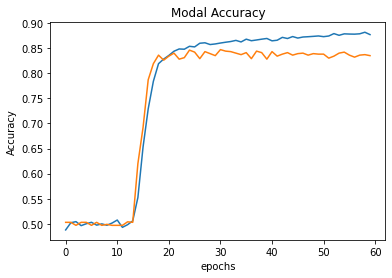

In [281]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Modal Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")


In [282]:
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model/assets


INFO:tensorflow:Assets written to: chatbot_model/assets


In [283]:
model.load_weights("chatbot_model")

In [284]:
pred_results=model.predict(([input_test,ques_test]))

In [285]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [286]:
story=' '.join(test_data[0][0])

In [287]:
story

'Mary got the milk there . John moved to the bedroom .'

In [288]:
ques=' '.join(test_data[1][1])

In [289]:
ques

'Is John in the kitchen ?'

In [290]:
test_data[0][2]

'no'

In [291]:
val_max=np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
  if val==val_max:
    k=key
print("Predicted Answer is ",k)
print("Probability of certainity",pred_results[0][val_max])    


Predicted Answer is  no
Probability of certainity 0.99983263


In [292]:
#My story
story="Daniel went to office . Sandra discarded apple in the kitchen . Mary dropped the football ."
story.split()

['Daniel',
 'went',
 'to',
 'office',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'the',
 'kitchen',
 '.',
 'Mary',
 'dropped',
 'the',
 'football',
 '.']

In [293]:
#My Question
my_ques="Is Sandra in kitchen ? "
my_ques.split()

['Is', 'Sandra', 'in', 'kitchen', '?']

In [294]:
mydata=[(story.split(),my_ques.split(),'yes')]

In [295]:
my_story,my_ques,my_ans=vectorize_stories(mydata)

In [296]:
pred_results=model.predict(([my_story,my_ques]))

In [297]:
val_max=np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
  if val==val_max:
    k=key
print("Predicted Answer is ",k)
print("Probability of certainity",pred_results[0][val_max])    


Predicted Answer is  yes
Probability of certainity 0.9480155


In [298]:
#Question 2
my_ques_2="Is Mary in the office ? "
my_ques_2.split()

['Is', 'Mary', 'in', 'the', 'office', '?']

In [299]:
mydata1=[(story.split(),my_ques_2.split(),'no')]

In [300]:
my_story,my_ques,my_ans=vectorize_stories(mydata1)

In [301]:
pred_results=model.predict(([my_story,my_ques]))

In [302]:
val_max=np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
  if val==val_max:
    k=key
print("Predicted Answer is ",k)
print("Probability of certainity",pred_results[0][val_max])    


Predicted Answer is  yes
Probability of certainity 0.80594915


In [303]:
#Question 3
my_ques_3="Is Daniel in the office ? "
my_ques_3.split()

['Is', 'Daniel', 'in', 'the', 'office', '?']

In [304]:
mydata2=[(story.split(),my_ques_3.split(),'yes')]

In [305]:
my_story,my_ques,my_ans=vectorize_stories(mydata2)

In [306]:
pred_results=model.predict(([my_story,my_ques]))

In [307]:
val_max=np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
  if val==val_max:
    k=key
print("Predicted Answer is ",k)
print("Probability of certainity",pred_results[0][val_max])    


Predicted Answer is  yes
Probability of certainity 0.871441
